#TSF Task 1: Supervised Learning

###Name : Vishal Shah
###Email : visushah99@gmail.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Loading

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##Analysing Data

In [ ]:
# Total 25 rows are there in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

####There are no null values and hence data cleaning is not required

####Let's plot this data that we have on 2-D graph to eyeball our dataset and see if we can manually find any kind of relationship between the two parameters- Hours and Scores.

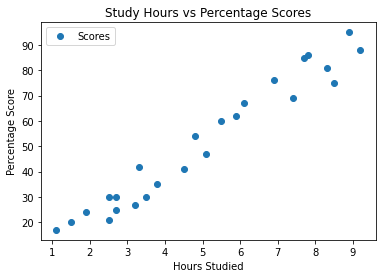

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

####Plotting regressor plot to determine the relationship between feature and target

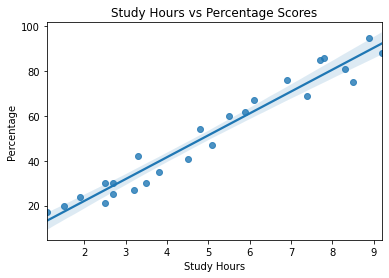

In [ ]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

####**From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.**

###Preparing Data for training and separate it in Features and Targeted output

In [ ]:
X = data.iloc[:, :-1].values  #Features
y = data.iloc[:, 1].values    #Labels

###Splitting the data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###Now we create object of LinearRegreesion method and train our dataset on it

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.68207815]
Intercept -  2.826892353899737


###Plotting the regression line between predicted data point and actual data point

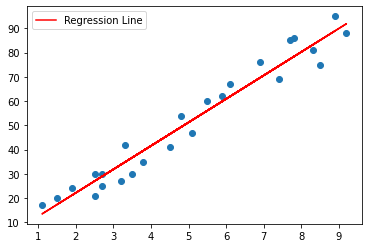

In [ ]:
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

###Making the prediction and testing our trained model

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364417
Test Score: 0.9678055545167994


##Let's Predict the score for 9.25 hours per day

In [ ]:
print('Score of student who studied for 9.25 hours a day is : ', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day is :  [92.38611528]


###Model Evaluation Metrics

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272


#<h1><center>Thank You</center></h1>